<a href="https://colab.research.google.com/github/jubatistim/GoogleColabsGeneral/blob/master/ML_20200508_decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

Data: https://drive.google.com/file/d/1Cn0HHRG7Q16xROMukBHUqNkPjHtjqce9/view?usp=sharing

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [5]:
print(X_train[1:10,:])

[[    53 143000]
 [    20  49000]
 [    38  50000]
 [    35  39000]
 [    60 102000]
 [    35  50000]
 [    57  74000]
 [    30  49000]
 [    39 122000]]


In [6]:
print(y_train)

[0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 0 1]


In [7]:
print(X_test[1:10,:])

[[    27  96000]
 [    37  71000]
 [    46 117000]
 [    35  75000]
 [    55  39000]
 [    47  43000]
 [    52  90000]
 [    31  68000]
 [    29  47000]]


In [8]:
print(y_test)

[0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0]


## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train[1:10,:])

[[ 1.47183395  2.14455979]
 [-1.69994578 -0.59864016]
 [ 0.03011589 -0.56945718]
 [-0.25822772 -0.89046994]
 [ 2.1446357   0.94805769]
 [-0.25822772 -0.56945718]
 [ 1.85629209  0.1309343 ]
 [-0.73880041 -0.59864016]
 [ 0.12623043  1.53171725]]


In [11]:
print(X_test[1:10,:])

[[-1.02714402  0.77295982]
 [-0.06599865  0.04338536]
 [ 0.79903219  1.38580236]
 [-0.25822772  0.16011727]
 [ 1.66406302 -0.89046994]
 [ 0.89514672 -0.77373803]
 [ 1.37571941  0.59786195]
 [-0.64268587 -0.04416357]
 [-0.83491495 -0.65700612]]


## Training the Decision Tree Classification model on the Training set

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predicting a new result

In [13]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[1:15,:])

[[1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[57  6]
 [ 6 31]]


0.88

## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


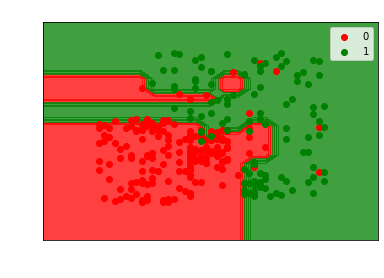

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)', fontdict={'color':'white'})
plt.xlabel('Age', fontdict={'color':'white'})
plt.ylabel('Estimated Salary', fontdict={'color':'white'})
plt.legend()
plt.tick_params(colors='w')
plt.show()

## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


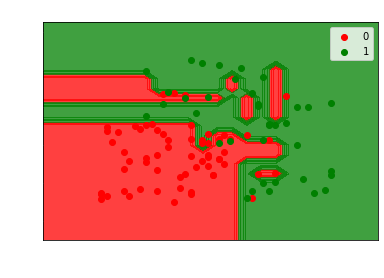

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)', fontdict={'color':'white'})
plt.xlabel('Age', fontdict={'color':'white'})
plt.ylabel('Estimated Salary', fontdict={'color':'white'})
plt.legend()
plt.tick_params(colors='w')
plt.show()